# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,40.38
1,NaN,"Jan 02, 1979",1979/01/02,38.92
2,NaN,"Jan 03, 1979",1979/01/03,24.24
3,NaN,"Jan 04, 1979",1979/01/04,14.75
4,NaN,"Jan 05, 1979",1979/01/05,14.62
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,36.93
12050,NaN,"Dec 29, 2011",2011/12/29,25.04
12051,NaN,"Dec 30, 2011",2011/12/30,34.93
12052,NaN,"Dec 31, 2011",2011/12/31,38.43


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df[df.Notes != 'Total']
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,40.38
1,NaN,"Jan 02, 1979",1979/01/02,38.92
2,NaN,"Jan 03, 1979",1979/01/03,24.24
3,NaN,"Jan 04, 1979",1979/01/04,14.75
4,NaN,"Jan 05, 1979",1979/01/05,14.62
...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,40.38
12049,NaN,"Dec 28, 2011",2011/12/28,36.93
12050,NaN,"Dec 29, 2011",2011/12/29,25.04
12051,NaN,"Dec 30, 2011",2011/12/30,34.93


In [5]:
df = df.drop('Notes', axis = 1)
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,40.38
1,"Jan 02, 1979",1979/01/02,38.92
2,"Jan 03, 1979",1979/01/03,24.24
3,"Jan 04, 1979",1979/01/04,14.75
4,"Jan 05, 1979",1979/01/05,14.62
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,40.38
12049,"Dec 28, 2011",2011/12/28,36.93
12050,"Dec 29, 2011",2011/12/29,25.04
12051,"Dec 30, 2011",2011/12/30,34.93


>3) Make a column called Date that is in the pandas datetime format

In [6]:
df['Date'] = pd.to_datetime(df['Month Day, Year'],errors='raise')
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,"Jan 01, 1979",1979/01/01,40.38,1979-01-01
1,"Jan 02, 1979",1979/01/02,38.92,1979-01-02
2,"Jan 03, 1979",1979/01/03,24.24,1979-01-03
3,"Jan 04, 1979",1979/01/04,14.75,1979-01-04
4,"Jan 05, 1979",1979/01/05,14.62,1979-01-05
...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,40.38,2011-12-27
12049,"Dec 28, 2011",2011/12/28,36.93,2011-12-28
12050,"Dec 29, 2011",2011/12/29,25.04,2011-12-29
12051,"Dec 30, 2011",2011/12/30,34.93,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Day,Month,Year
0,"Jan 01, 1979",1979/01/01,40.38,1979-01-01,1,1,1979
1,"Jan 02, 1979",1979/01/02,38.92,1979-01-02,2,1,1979
2,"Jan 03, 1979",1979/01/03,24.24,1979-01-03,3,1,1979
3,"Jan 04, 1979",1979/01/04,14.75,1979-01-04,4,1,1979
4,"Jan 05, 1979",1979/01/05,14.62,1979-01-05,5,1,1979
...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,40.38,2011-12-27,27,12,2011
12049,"Dec 28, 2011",2011/12/28,36.93,2011-12-28,28,12,2011
12050,"Dec 29, 2011",2011/12/29,25.04,2011-12-29,29,12,2011
12051,"Dec 30, 2011",2011/12/30,34.93,2011-12-30,30,12,2011


In [8]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

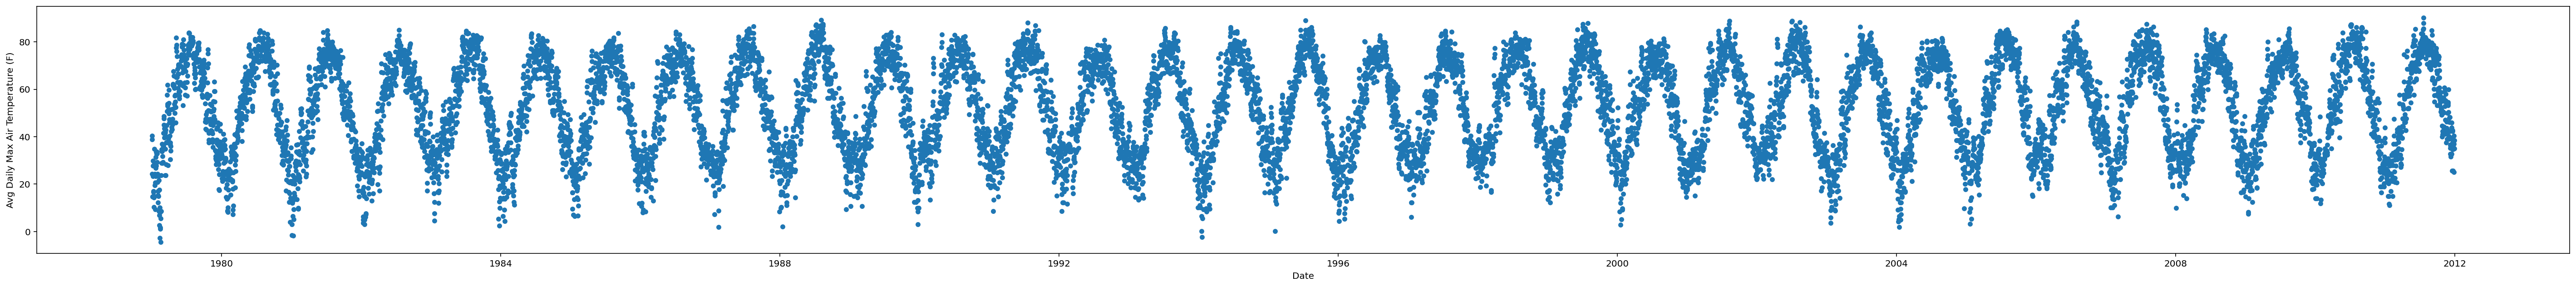

In [9]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(50,5))

>5) Describe your plot.

The Graph is harmonic and shows the temperature flucuating up and down through the seasons every year. It however is not clear if the average temperature is changing between the years themselves. 

### Adding colors for our graph

In [10]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

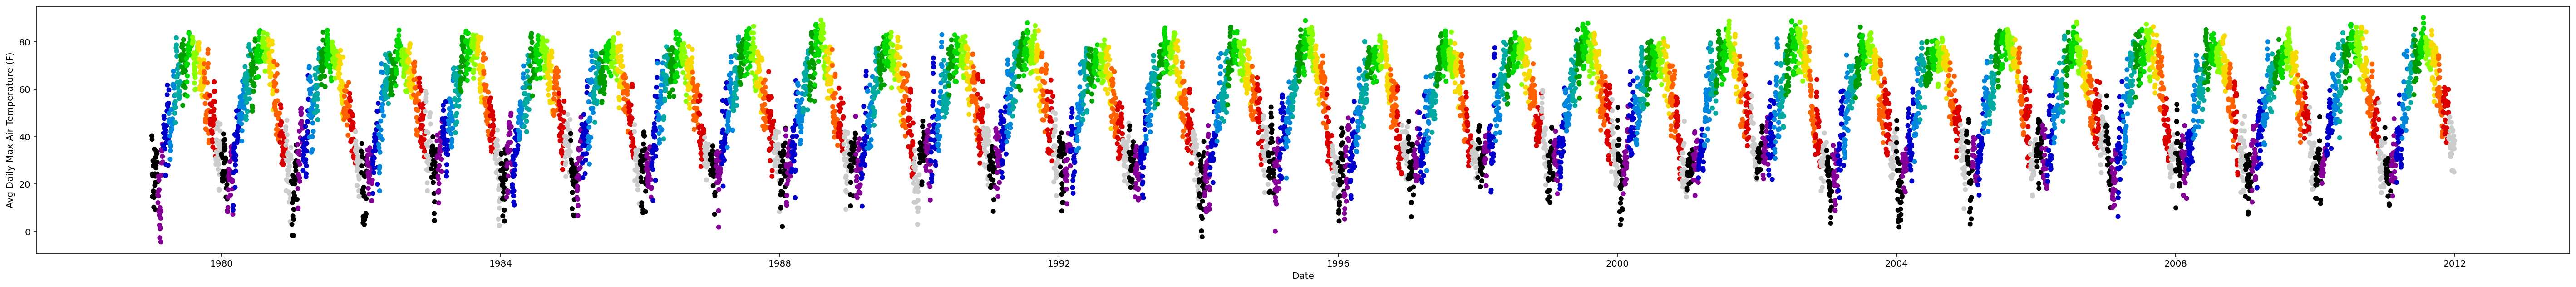

In [11]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(50,5), c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [12]:
newDF = df[(df['Date'] > '2010-01-01') & (df['Date'] < '2010-06-30')]
newDF

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Day,Month,Year,DateInt,color
11324,"Jan 02, 2010",2010/01/02,26.30,2010-01-02,2,1,2010,12623904.0,#000000
11325,"Jan 03, 2010",2010/01/03,14.04,2010-01-03,3,1,2010,12624768.0,#000000
11326,"Jan 04, 2010",2010/01/04,19.61,2010-01-04,4,1,2010,12625632.0,#000000
11327,"Jan 05, 2010",2010/01/05,22.07,2010-01-05,5,1,2010,12626496.0,#000000
11328,"Jan 06, 2010",2010/01/06,24.16,2010-01-06,6,1,2010,12627360.0,#000000
...,...,...,...,...,...,...,...,...,...
11498,"Jun 25, 2010",2010/06/25,74.83,2010-06-25,25,6,2010,12774240.0,#009c00
11499,"Jun 26, 2010",2010/06/26,74.38,2010-06-26,26,6,2010,12775104.0,#009c00
11500,"Jun 27, 2010",2010/06/27,77.98,2010-06-27,27,6,2010,12775968.0,#009c00
11501,"Jun 28, 2010",2010/06/28,78.81,2010-06-28,28,6,2010,12776832.0,#009c00


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

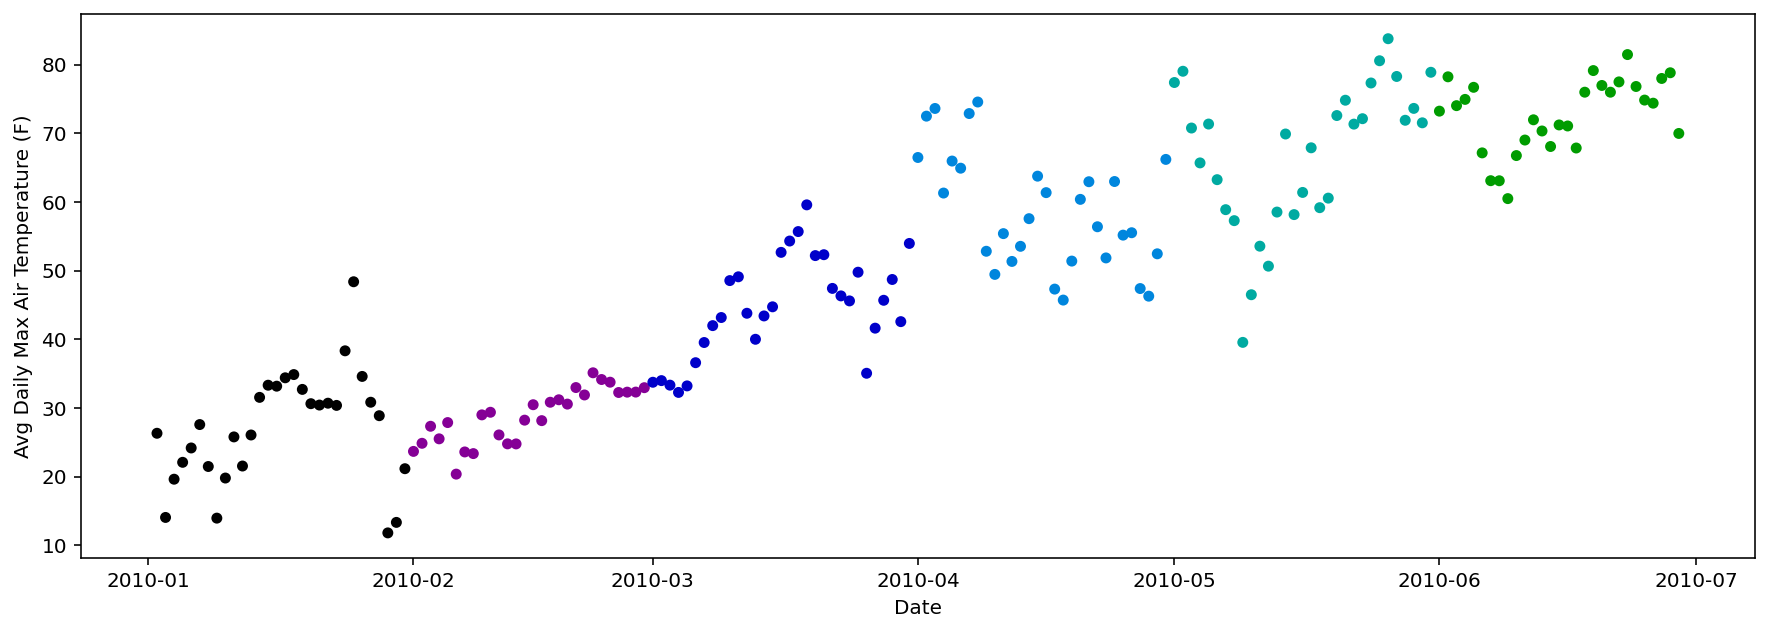

In [13]:
newDF.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(15,5), c=newDF['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [14]:
X=newDF['DateInt'].values
Y=newDF['Avg Daily Max Air Temperature (F)'].values

In [15]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [16]:
Y_pred = lin_reg(X,Y)

0.0003892594103739044 -4893.955025422136


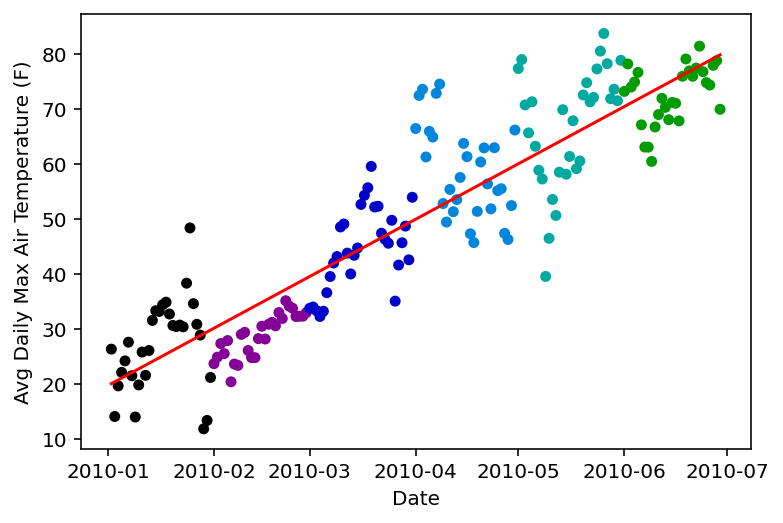

In [17]:
newDF.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=newDF['color'])
plt.plot([min(newDF['Date'].values), max(newDF['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

Slope:.0003892594103739044
Intercept: -4893.955025422136

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [18]:
min(Y_pred)

20.018402234637506

In [19]:
max(Y_pred)

79.88338547486092

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [20]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values

In [21]:
Y_pred = lin_reg(X,Y)

2.9512404066376017e-07 50.21476933875328


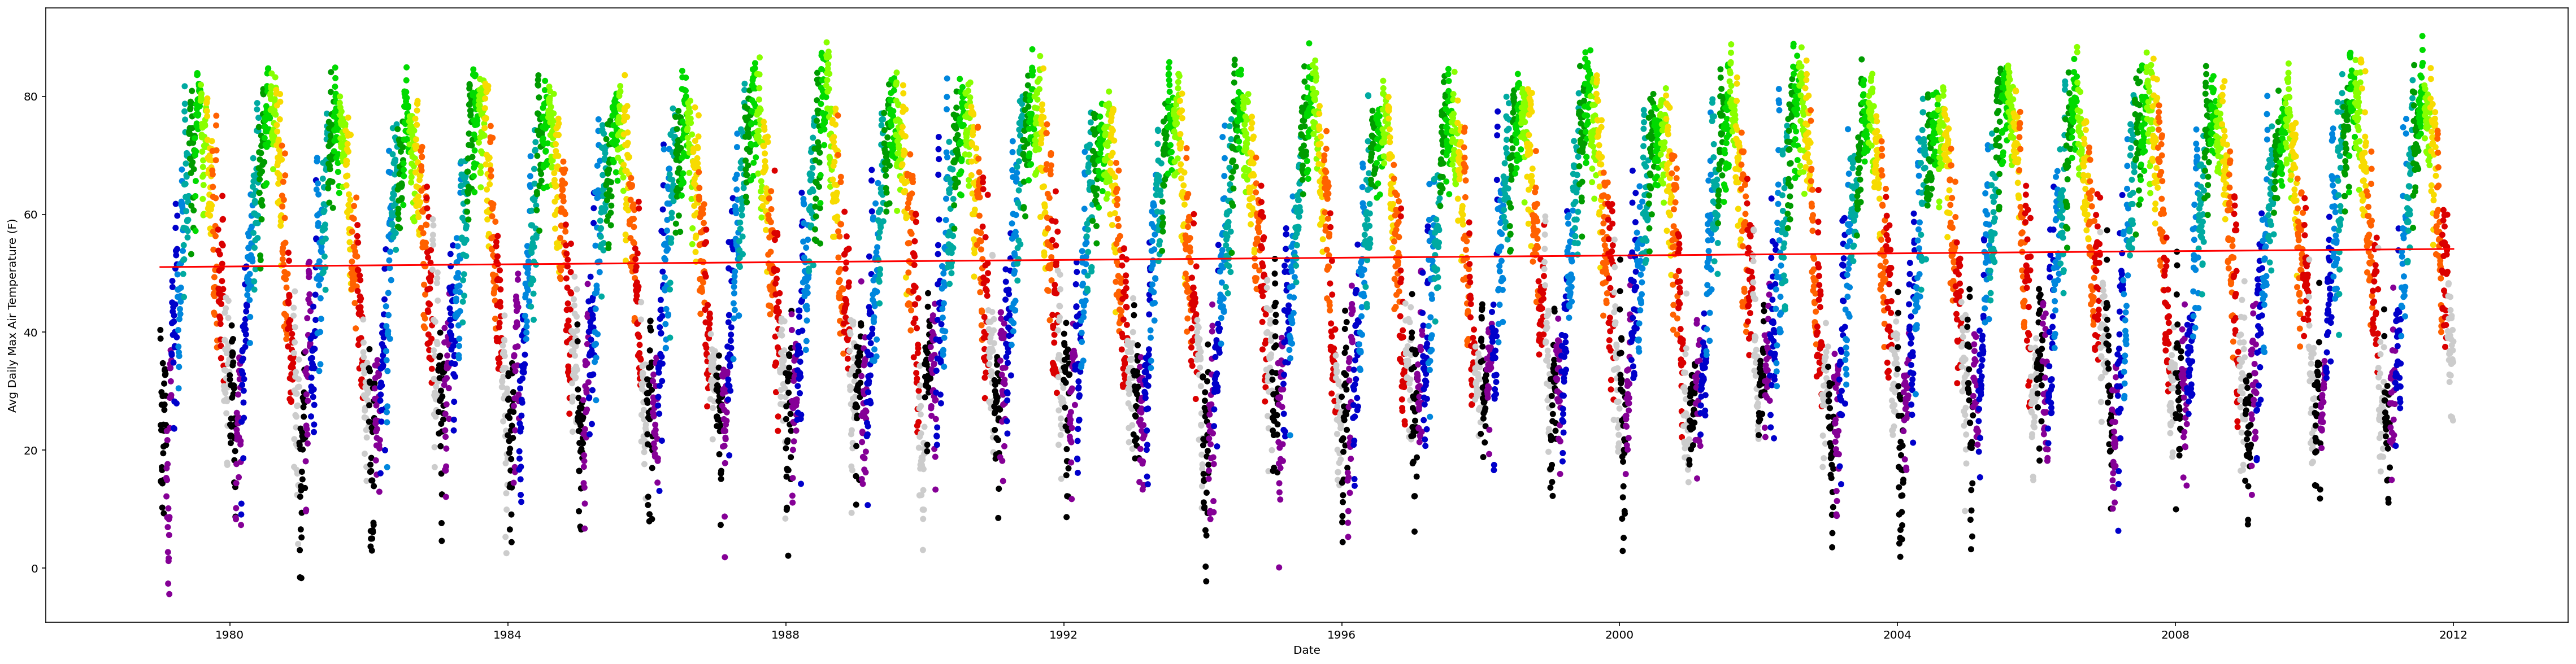

In [22]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize = (40, 10))
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

The slope is positive. This means the average temperature in New York increased over the span 1979-2011. 